In [5]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier, plot_tree
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv("UNSW_NB15.csv")

X = df.drop(columns=["attack_cat"])
y = df['attack_cat']

print("Missing values in features:\n", X.isnull().sum())
print("Missing values in target:\n", y.isnull().sum())


Missing values in features:
 id                   0
dur                  0
proto                0
service              0
state                0
spkts                0
dpkts                0
sbytes               0
dbytes               0
rate                 0
sttl                 0
dttl                 0
sload                0
dload                0
sloss                0
dloss                0
sinpkt               0
dinpkt               0
sjit                 0
djit                 0
swin                 0
stcpb                0
dtcpb                0
dwin                 0
tcprtt               0
synack               0
ackdat               0
smean                0
dmean                0
trans_depth          0
response_body_len    0
ct_srv_src           0
ct_state_ttl         0
ct_dst_ltm           0
ct_src_dport_ltm     0
ct_dst_sport_ltm     0
ct_dst_src_ltm       0
is_ftp_login         0
ct_ftp_cmd           0
ct_flw_http_mthd     0
ct_src_ltm           0
ct_srv_dst           0
is_sm

In [7]:
numerical_features = X.select_dtypes(include=['number']).columns
scaler = StandardScaler()
X[numerical_features] = scaler.fit_transform(X[numerical_features])


In [8]:
# Encode categorical features
categorical_features = X.select_dtypes(include=['object'])
label_encoder = LabelEncoder()
for col in categorical_features.columns:
    X[col] = label_encoder.fit_transform(X[col])

y_encoded = label_encoder.fit_transform(y)


In [9]:
# PCA for dimensionality reduction
pca = PCA()
pca.fit(X[numerical_features])
cumulative_variance = pca.explained_variance_ratio_.cumsum()

n_components = len(cumulative_variance[cumulative_variance < 0.90]) + 1
print(f"90% variance: {n_components}")

pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X[numerical_features])

X = pd.DataFrame(data=X_pca, columns=[f'PC{i}' for i in range(1, n_components + 1)])


90% variance: 16


In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

In [11]:
Dtree_classifier = DecisionTreeClassifier(random_state=42)
Dtree_classifier.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

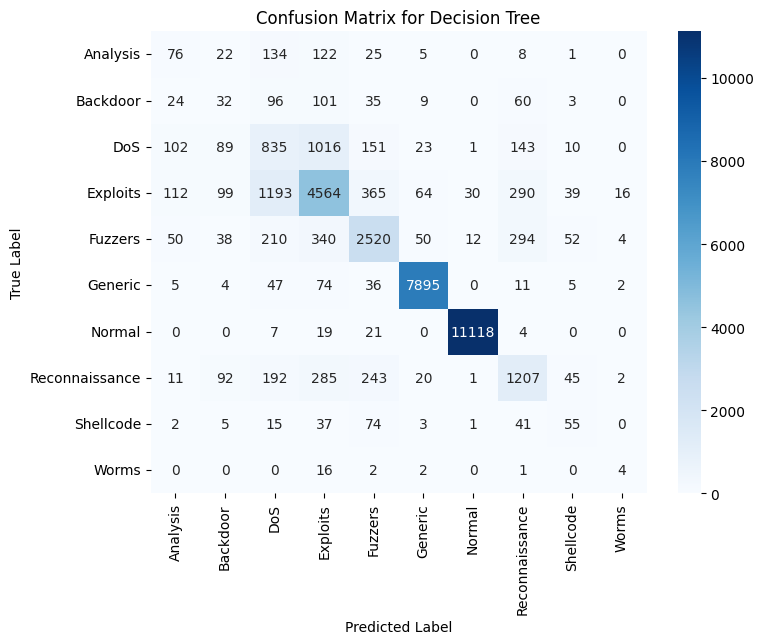

In [12]:
y_pred = Dtree_classifier.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title("Confusion Matrix for Decision Tree")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


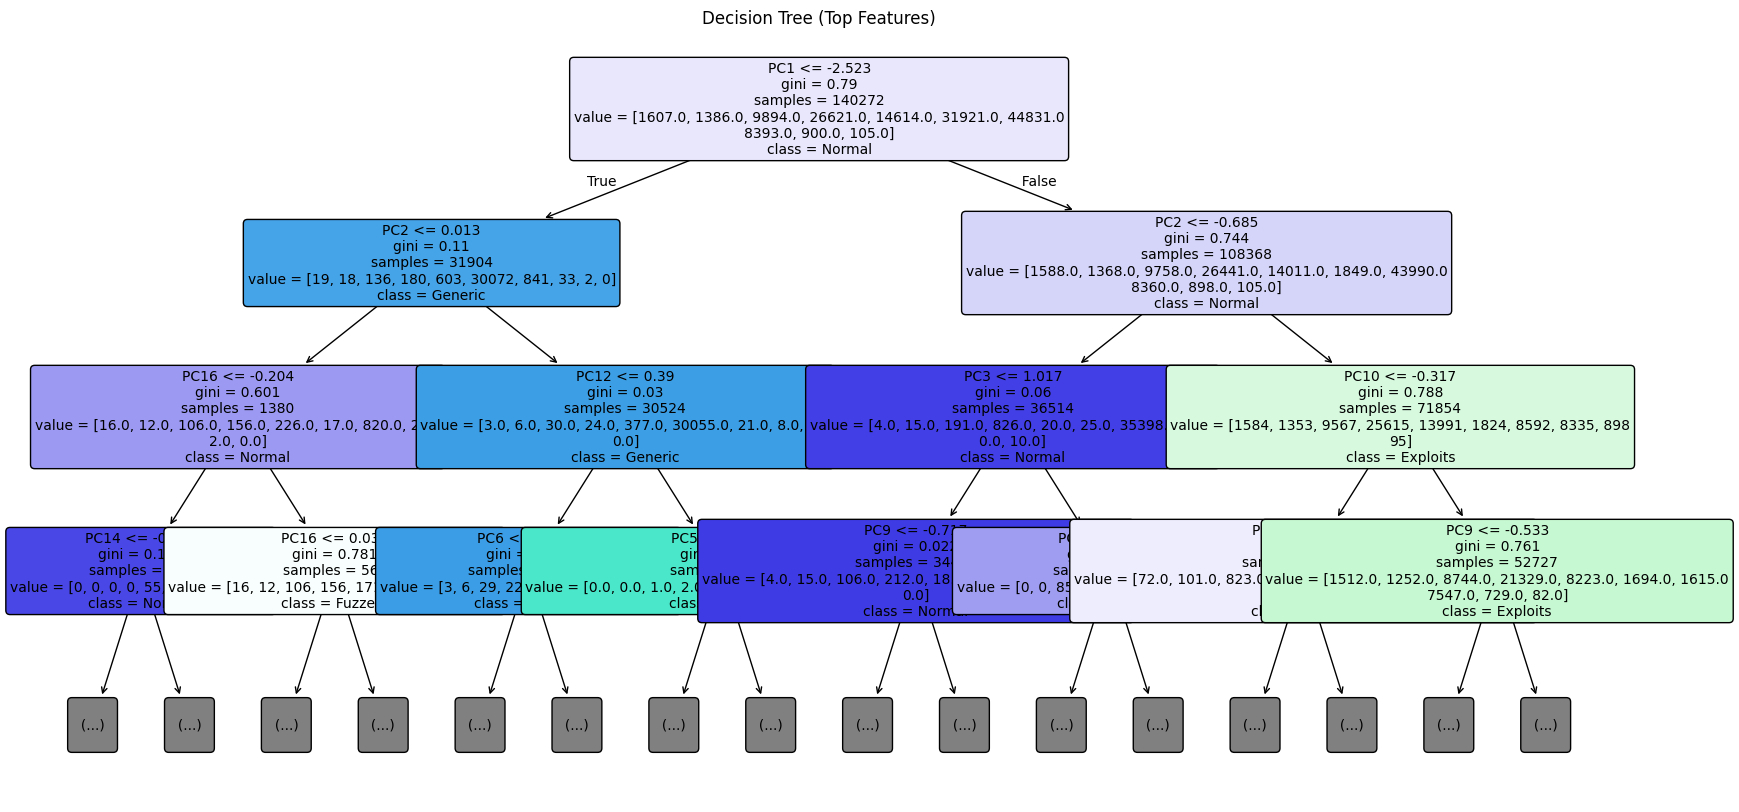

In [13]:
plt.figure(figsize=(20, 10))
plot_tree(
    Dtree_classifier,
    feature_names=X.columns,
    class_names=label_encoder.classes_,
    filled=True,
    rounded=True,
    max_depth=3,
    fontsize=10
)
plt.title("Decision Tree (Top Features)")
plt.show()


In [14]:
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, f1_score, confusion_matrix

id3_tree = DecisionTreeClassifier(criterion='entropy', random_state=42)
id3_tree.fit(X_train, y_train)

y_pred_id3 = id3_tree.predict(X_test)

accuracy_id3 = accuracy_score(y_test, y_pred_id3)
precision_id3 = precision_score(y_test, y_pred_id3, average='weighted')  
recall_id3 = recall_score(y_test, y_pred_id3, average='weighted')
f1_id3 = f1_score(y_test, y_pred_id3, average='weighted')

print("ID3 Decision Tree Accuracy:", accuracy_id3)
print("Precision:", precision_id3)
print("Recall:", recall_id3)
print("F1-Score:", f1_id3)
print("\nClassification Report for ID3 Decision Tree:\n", classification_report(y_test, y_pred_id3))

ID3 Decision Tree Accuracy: 0.8071231001739428
Precision: 0.8124333432394929
Recall: 0.8071231001739428
F1-Score: 0.8095864915990895

Classification Report for ID3 Decision Tree:
               precision    recall  f1-score   support

           0       0.18      0.17      0.18       393
           1       0.08      0.10      0.09       360
           2       0.30      0.35      0.33      2370
           3       0.69      0.67      0.68      6772
           4       0.73      0.71      0.72      3570
           5       0.98      0.98      0.98      8079
           6       1.00      1.00      1.00     11169
           7       0.60      0.57      0.58      2098
           8       0.27      0.26      0.26       233
           9       0.09      0.12      0.10        25

    accuracy                           0.81     35069
   macro avg       0.49      0.49      0.49     35069
weighted avg       0.81      0.81      0.81     35069



In [15]:
feature_importance = pd.Series(Dtree_classifier.feature_importances_, index=X.columns).sort_values(ascending=False)
print("Feature Importance:\n", feature_importance)


Feature Importance:
 PC1     0.283833
PC2     0.242821
PC9     0.048226
PC4     0.045216
PC11    0.045210
PC10    0.044366
PC13    0.040017
PC3     0.038563
PC12    0.035185
PC15    0.032862
PC16    0.026239
PC6     0.024199
PC5     0.024038
PC8     0.023833
PC7     0.023370
PC14    0.022022
dtype: float64
